This is an example of how a capacitor reacts to an AC input. This input is in the from v=v0cos(wt) where w is the angular frequency (2*pi*f)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math

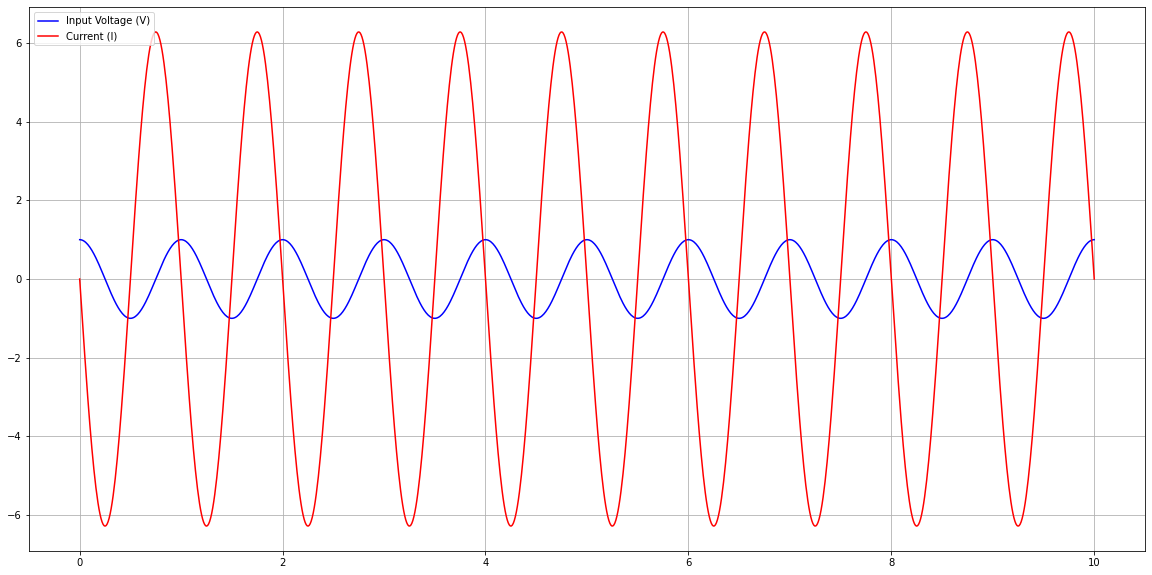

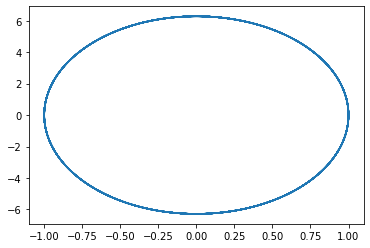

In [12]:
f = 1 #input frequency in Hz
v0 = 1 #voltage amplitude in volts
c = 1 #capacitance in farads
t=np.linspace(0,10,1000) #time array from first number to second in third number of steps
v = v0*np.cos(2*math.pi*f*t) #cosine voltage array


def i_cap(f,c,v0,t):
    dum = np.sin(2*math.pi*f*t)
    return(-2*math.pi*f*c*v0*dum)

i=[]
for j in range(len(t)):
    i.append(i_cap(f,c,v0,t[j]))
    
plt.figure(figsize=(20,10))
plt.plot(t,v,color='blue',label='Input Voltage (V)')

plt.plot(t,i,color='red',label='Current (I)')

plt.grid()
plt.legend()
plt.show()

plt.plot(v,i)
plt.show()

In [13]:
def rc_series(r,c,f,t,v0,v):
    pi=math.pi
    wc=2*pi*f*c
    ztot = complex(r,-(1/wc))
    print(ztot)
    rtot = abs(ztot)
    imax = v0/rtot
    phase = math.degrees(math.atan(ztot.imag/ztot.real))
    print(phase)
    i = imax * np.sin((2*pi*f*t)+phase)
    return (i)

(5-26.525823848649225j)
-79.32525058763125


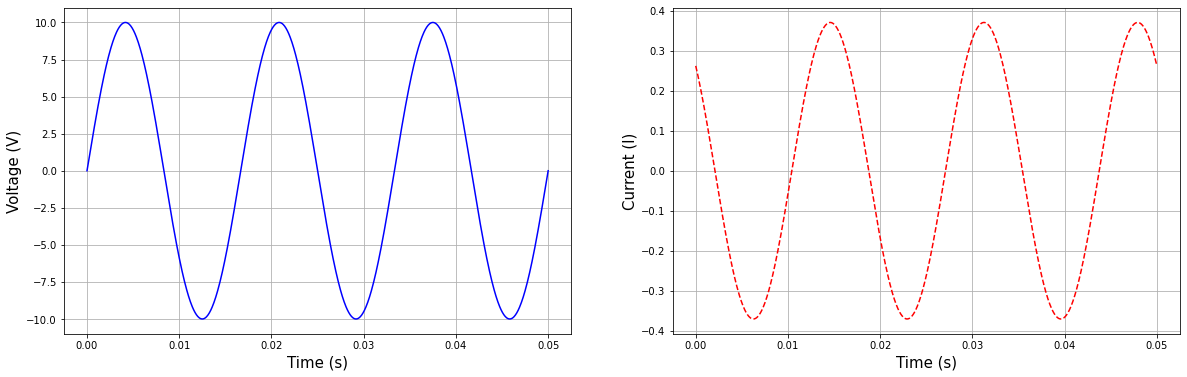

0.3704577397413192


In [14]:
r = 5 
c = 100e-6 
f = 60 
v0 = 10 
t = np.linspace(0,0.05,1000)
v = v0*np.sin(2*math.pi*f*t)
i = rc_series(r,c,f,t,v0,v)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(t,v,color='blue',label='V in')
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Voltage (V)',fontsize=15)
plt.grid()
plt.subplot(1,2,2)
plt.plot(t,i,color='red',linestyle='--')
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.show()
print(max(i))

Ignore cell below, this was simply doing I(t) = cdv(t)/dt and I dont think is correct. 

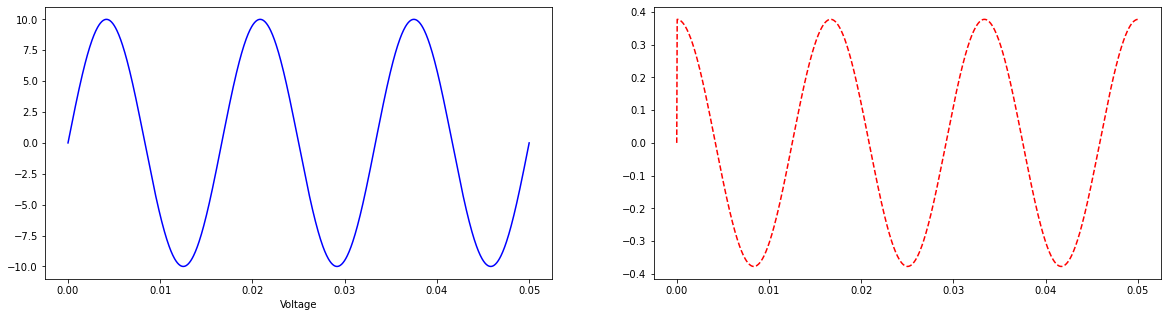

0.37696874959367505


In [15]:
t = np.linspace(0,0.05,1000)
v0 = 10
f = 60 
pi = math.pi
v = v0*np.sin(2*pi*f*t)
c = 100e-6
def capacitor_derivative(v,t,c):
    dum = []
    for i in range(len(t)):
        if i != 0 :
            dt = t[i] - t[i-1]
            dv = v[i] - v[i-1]
            dum.append(c*(dv/dt))
        else:
            dum.append(0)
    return(dum)
i = capacitor_derivative(v,t,c)


plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(t,v,color='blue')
plt.xlabel('Voltage')
plt.subplot(1,2,2)
plt.plot(t,i,color='red',linestyle='--')
plt.show()
print(max(i))

In [16]:
r = 100
f = 1
w = 2*math.pi*f
c = 100e-6
w0=1/(r*c)
ztot = r/(1+complex(0,(w/w0)))
rtot = abs(ztot)
print(rtot)
phase = math.degrees(math.atan(ztot.imag/ztot.real))
print(phase)

99.8031904503645
-3.5952737798681755


In [17]:
def rc_parallel(r,c,f,t,v0,v):
    w = 2*math.pi*f
    w0 = 1/(r*c)
    ztot = r/(1+complex(0,(w/w0)))
    rtot = abs(ztot)
    imax = v0/rtot
    phase = math.degrees(math.atan(ztot.imag/ztot.real))
    i = imax*np.sin((2*math.pi*f*t)+phase)
    return (i)

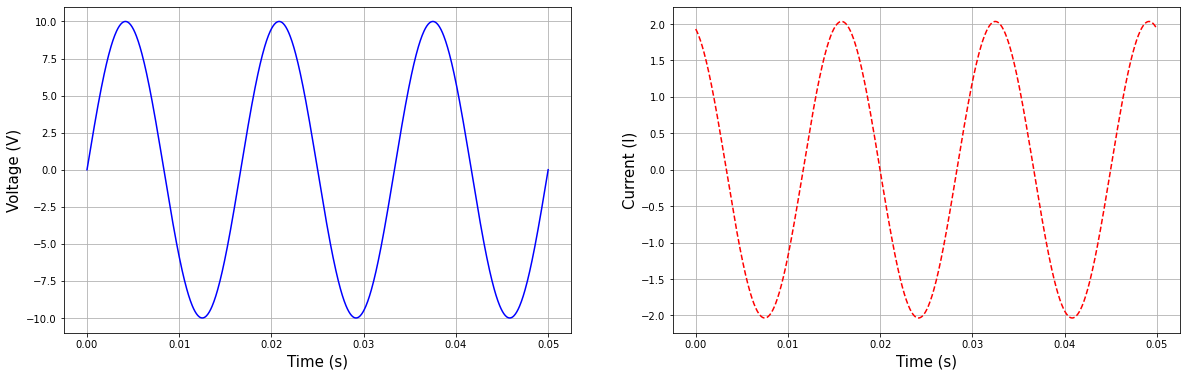

2.03522045184959


In [18]:
r = 5 
c = 100e-6 
f = 60 
v0 = 10 
t = np.linspace(0,0.05,1000)
v = v0*np.sin(2*math.pi*f*t)
i = rc_parallel(r,c,f,t,v0,v)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(t,v,color='blue',label='V in')
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Voltage (V)',fontsize=15)
plt.grid()
plt.subplot(1,2,2)
plt.plot(t,i,color='red',linestyle='--')
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.show()
print(max(i))

In [19]:
def rc_parallel2(r,c,f,t,v0,v):
    w = 2*math.pi*f
    w0 = 1/(r*c)
    ztot = r/(1+complex(0,(w/w0)))
    rtot = abs(ztot)
    imax = v0/rtot
    phase = math.degrees(math.atan(ztot.imag/ztot.real))
    
    ires = v/r
    zcap = complex(0,(w*c))
    rcap = abs(zcap)
    phasecap = 90
    imaxcap = v0/rcap
    icap = imaxcap*np.sin((2*math.pi*f*t)+phasecap)
    itot=icap+ires
    return(itot)

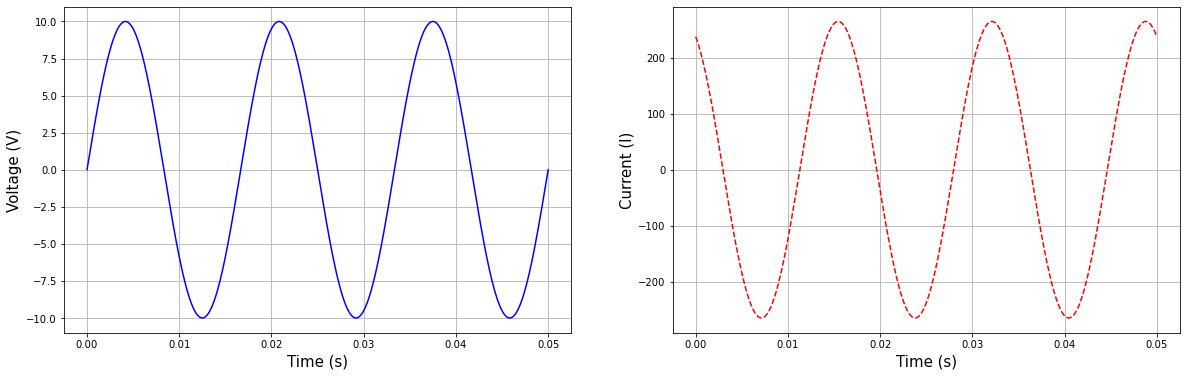

264.3648279580234


In [20]:
r = 5 
c = 100e-6 
f = 60 
v0 = 10 
t = np.linspace(0,0.05,1000)
v = v0*np.sin(2*math.pi*f*t)
i = rc_parallel2(r,c,f,t,v0,v)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(t,v,color='blue',label='V in')
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Voltage (V)',fontsize=15)
plt.grid()
plt.subplot(1,2,2)
plt.plot(t,i,color='red',linestyle='--')
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()
plt.show()
print(max(i))

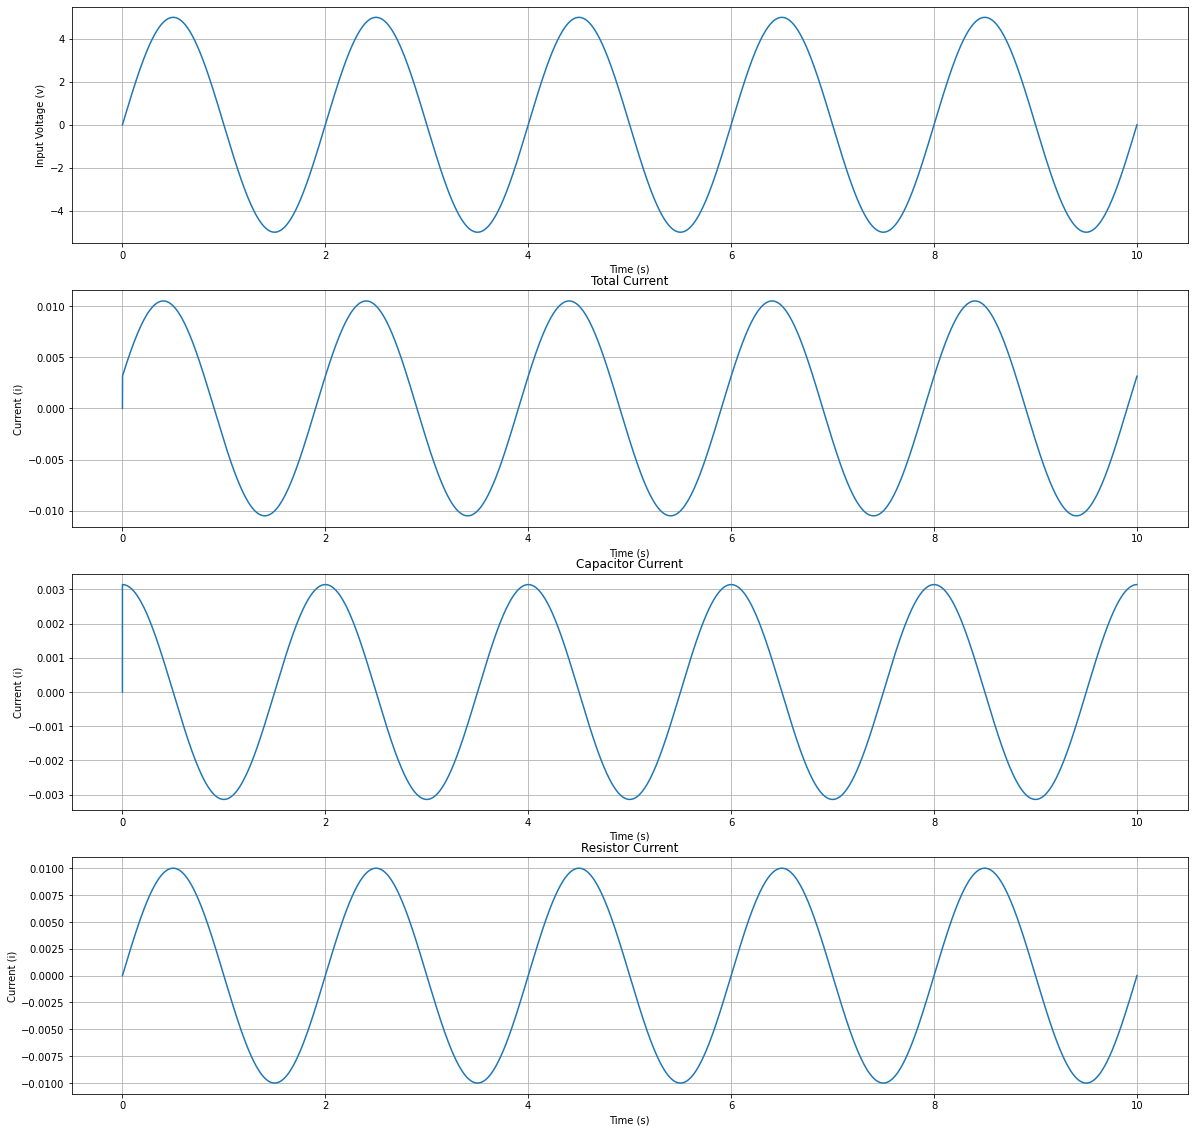

In [51]:
import math
import numpy as np
import matplotlib.pyplot as plt
def rc_parallel(c,r,v,t):
    def i_cap(c,v,t):
        i=[]
        for j in range(len(v)):
            if j == 0:
                i.append(0)
            else:
                dv = v[j]-v[j-1]
                dt = t[j]-t[j-1]
                i.append(c*dv/dt)
        return i
    def i_res(r,v):
        return(v/r)
    
    icap = i_cap(c,v,t)
    ires = i_res(r,v)
    return([icap+ires,icap,ires])
def sin (x,a,f,phase=0):
    'return the sin of x at frequency f with amplitude a, assuming no phase,phase needs to be given in radiens'
    return a*np.sin((2*math.pi*f*x)+phase)

c = 200e-6 #capacitors capacitance in farads
r = 500 #resistors resistance in ohms
t = np.linspace(0,10,100000) #time array
v0 = 5 #voltage amplitude
f = 0.5 #input voltage frequency 
phase = 0 #input voltage phase
v = sin(t,v0,f,phase)

i = rc_parallel(c,r,v,t)[0]
icap = rc_parallel(c,r,v,t)[1]
ires = rc_parallel(c,r,v,t)[2]

plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
plt.plot(t,v)
plt.xlabel('Time (s)')
plt.ylabel('Input Voltage (v)')
plt.grid()

plt.subplot(4,1,2)
plt.title('Total Current')
plt.plot(t,i)
plt.xlabel('Time (s)')
plt.ylabel('Current (i)')
plt.grid()

plt.subplot(4,1,3)
plt.title('Capacitor Current')
plt.plot(t,icap)
plt.xlabel('Time (s)')
plt.ylabel('Current (i)')
plt.grid()

plt.subplot(4,1,4)
plt.title('Resistor Current')
plt.plot(t,ires)
plt.xlabel('Time (s)')
plt.ylabel('Current (i)')
plt.grid()

plt.show()

In [47]:
file = 'D:\\harry\\PhD Work\\Project_Michael\\RC Parallel runs for comparison in python\\C_200e-6 r_500 v0_5 f_0.5'
def SPICEfileReader (filetoread,columns):
    'reads LTSpice files, needs '' over the file name and the number of columns in the file'
    f=open(filetoread,'r')#opens the file
    dum = f.readlines()[1:]#reads the data, but skips the first line as they are column titles 
    f.close()#closes the file
    data=[]#empty array for the data later
    for i in dum: #goes through all the data
        dum1=i.split('\t')#splits the data at every column, making rows
        for j in dum1:#goes through each of these rows
            data.append(float(j.split('\n')[0]))#splits the data at the end point, and gets rid of the new row command from the data
    rows=int(len(data)/columns)#caluclates how many rows there are
    out=np.reshape(data,(rows,columns))#re-shapes the data into a useable format
    return(out)#returns the data
data = SPICEfileReader(file,5)

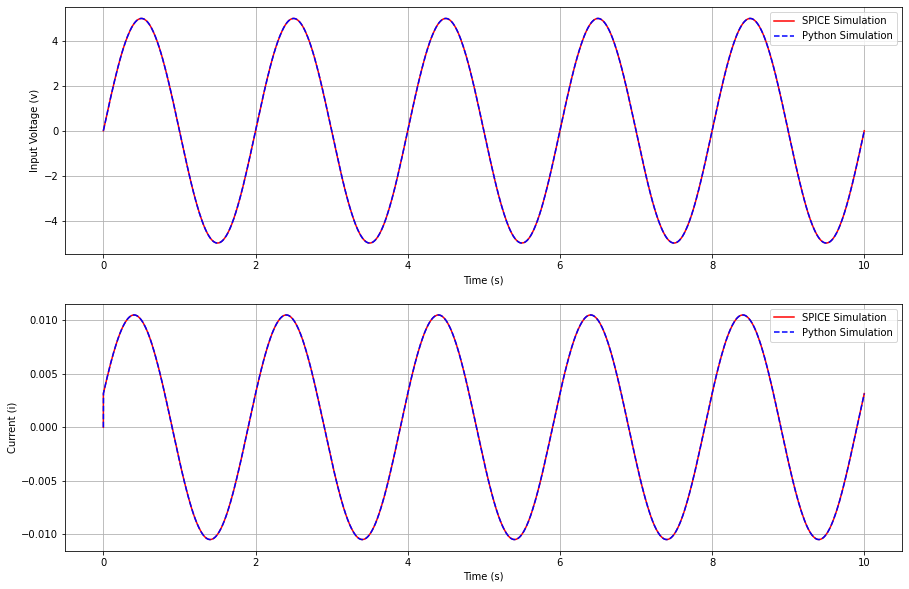

In [66]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(data[:,0],data[:,1],color='red',label='SPICE Simulation')
plt.plot(t,v,color='blue',label='Python Simulation',linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Input Voltage (v)')
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.plot(data[:,0],data[:,3],color='red',label='SPICE Simulation') #change 2 to 3
plt.plot(t,i,color='blue',label='Python Simulation',linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Current (i)')
plt.grid()
plt.legend()

# plt.subplot(4,1,3)
# plt.plot(data[:,0],data[:,2],color='red',label='SPICE Simulation')
# plt.plot(t,icap,color='blue',label='Python Simulation',linestyle='--')
# plt.xlabel('Time (s)')
# plt.ylabel('Current (i)')
# plt.grid()
# plt.legend()

# plt.subplot(4,1,4)
# plt.plot(data[:,0],data[:,4],color='red',label='SPICE Simulation')
# plt.plot(t,ires,color='blue',label='Python Simulation',linestyle='--')
# plt.xlabel('Time (s)')
# plt.ylabel('Current (i)')
# plt.grid()
# plt.legend()

plt.show()

In [ ]:
def rc_parallel(c,r,v,t):
    def i_cap(c,v,t):
        i=[]
        for j in range(len(v)):
            if j == 0:
                i.append(0)
            else:
                dv = v[j]-v[j-1]
                dt = t[j]-t[j-1]
                i.append(c*dv/dt)
        return i
    def i_res(r,v):
        return(v/r)
    
    icap = i_cap(c,v,t)
    ires = i_res(r,v)
    return([icap+ires,icap,ires])